<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/TAM2025-2/blob/main/Copia_de_2_DL_Keras_API_funcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [ ]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.19.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


- Se presenta un ejemplo de la base de datos

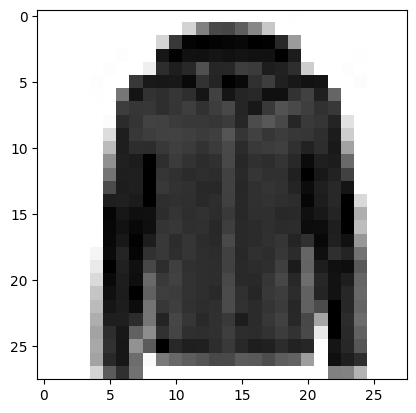

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [ ]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [ ]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

- En el cuaderno introductorio a redes neuronales con tensorflow se planteó la construcción de modelos mediante secuencia de capas:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ red1 (Dense)                    │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hred2 (Dense)                   │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

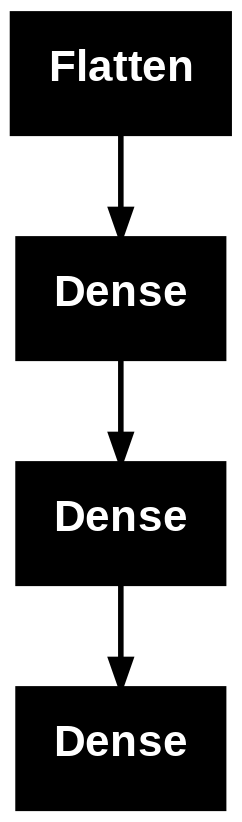

In [ ]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

- Aunque la implementacióm mediante secuencia es intuitiva, no permite realizar conexiones flexibles entre capas.

- En ese sentido, Keras permite crear capas bajo el principio de funciones y argumentos, como se muestra a continuación.

**Nota**: a diferencia de la estructura secuencial, en la API funcional se debe indicar la capa o capas de entrada y la capa o capas de salida para crear el grafo computacional de forma apropiada.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h1 (Dense)                      │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,560 (654.53 KB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 0 (0.00 B)

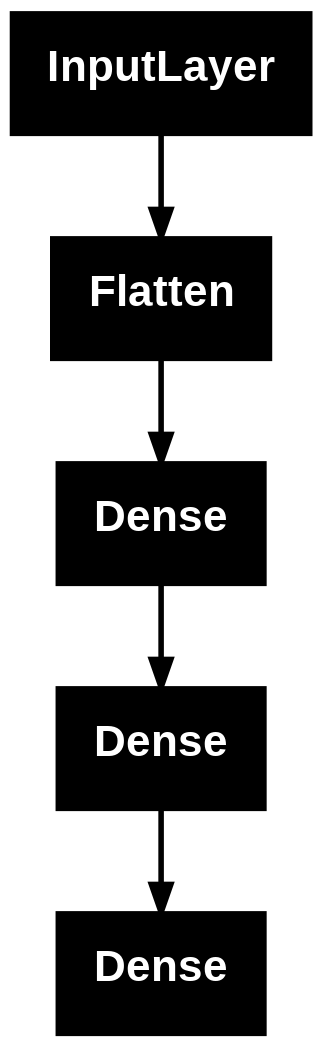

In [ ]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


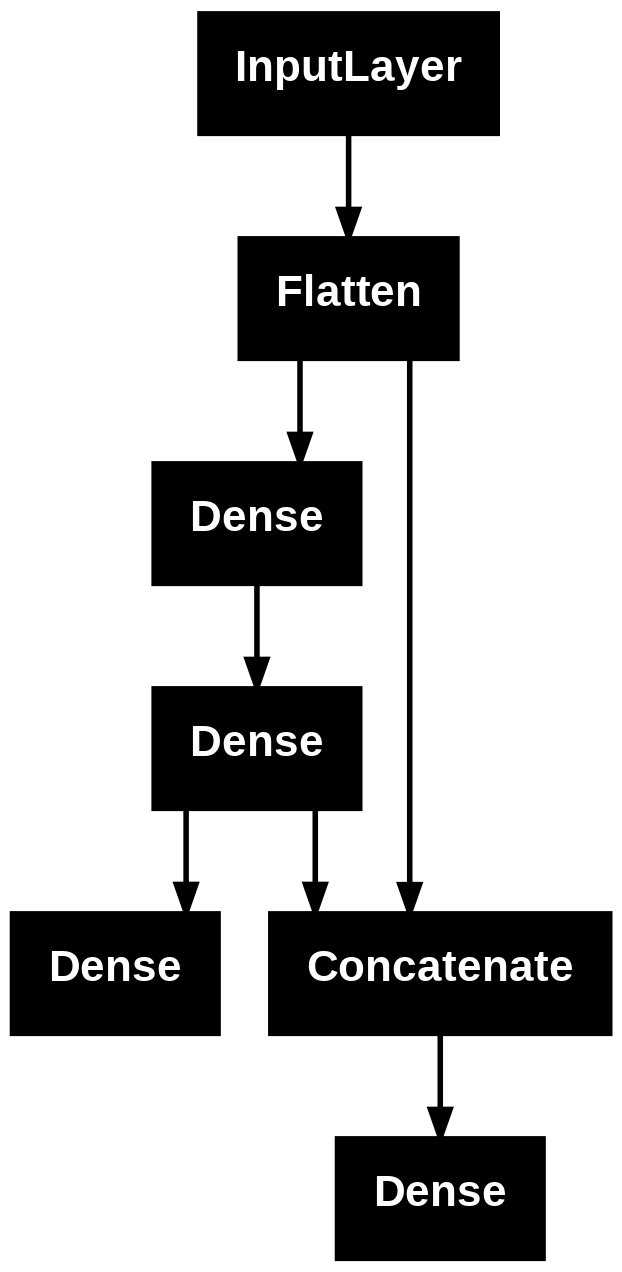

In [ ]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [ ]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy


- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [ ]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 1.5172 - outputA_accuracy: 0.7152 - outputA_loss: 0.8201 - outputB_accuracy: 0.7638 - outputB_loss: 0.6971 - val_loss: 0.8428 - val_outputA_accuracy: 0.8508 - val_outputA_loss: 0.4232 - val_outputB_accuracy: 0.8484 - val_outputB_loss: 0.4187
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7999 - outputA_accuracy: 0.8549 - outputA_loss: 0.4058 - outputB_accuracy: 0.8572 - outputB_loss: 0.3941 - val_loss: 0.7671 - val_outputA_accuracy: 0.8632 - val_outputA_loss: 0.3831 - val_outputB_accuracy: 0.8608 - val_outputB_loss: 0.3832
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.6934 - outputA_accuracy: 0.8755 - outputA_loss: 0.3515 - outputB_accuracy: 0.8772 - outputB_loss: 0.3419 - val_loss: 0.7682 - val_outputA_accuracy: 0.8611 - val_outputA_loss: 0.3868 - val_outputB_accuracy: 0.8638 - val_outputB_loss: 0.3805
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6535 - outputA_accuracy: 0.8801 

- Se presentan las curvas de desempeño:

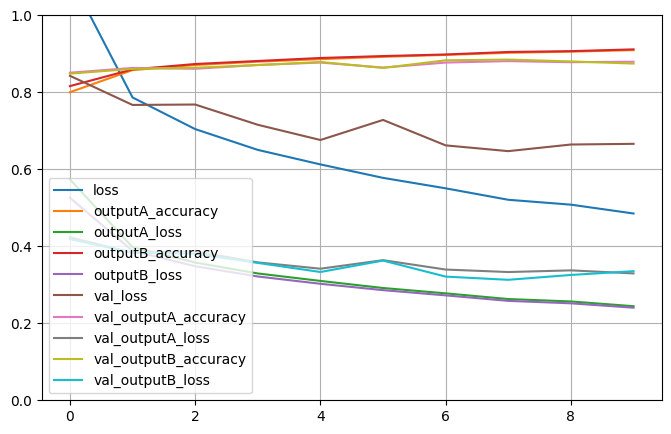

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [ ]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10) (10000, 10)


In [ ]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [ ]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7201 - outputA_accuracy: 0.8705 - outputA_loss: 0.3551 - outputB_accuracy: 0.8619 - outputB_loss: 0.3650
[0.7175248265266418, 0.3532751500606537, 0.3634088635444641, 0.8712999820709229, 0.8622999787330627]


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

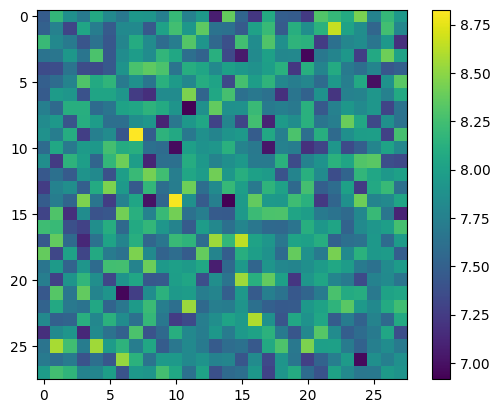

In [ ]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [ ]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

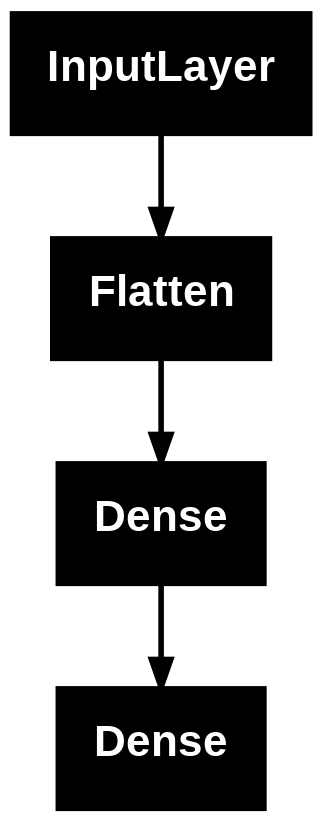

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [ ]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 50)

### Dado que se fijaron 50 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

Reducción de dimensión lineal basado en la preservación de la varianza

![PCA1](https://www.soloentendidos.com/wp-content/uploads/2021/06/Principal-Component-Analysis-second-principal_thumb-1.gif)


![PCA2](https://1.bp.blogspot.com/-pgMAHiIWvuw/Tql5HIXNdRI/AAAAAAAABLI/I2zPF5cLRwQ/s1600/clust.gif)


# t-student distributed Stochastic Neighbor Embedding (t-SNE)

Reducción de dimensión basado en la preservación de localidades (vecinos) utilizando medidas de información desde estimación no paramétrica de probabilidad en el espación de alta y baja dimensión, respectivamente.

![tsne](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)

![tsne2](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

In [ ]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

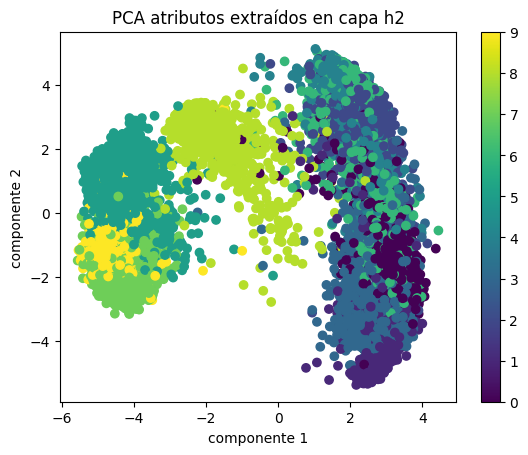

In [ ]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [ ]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

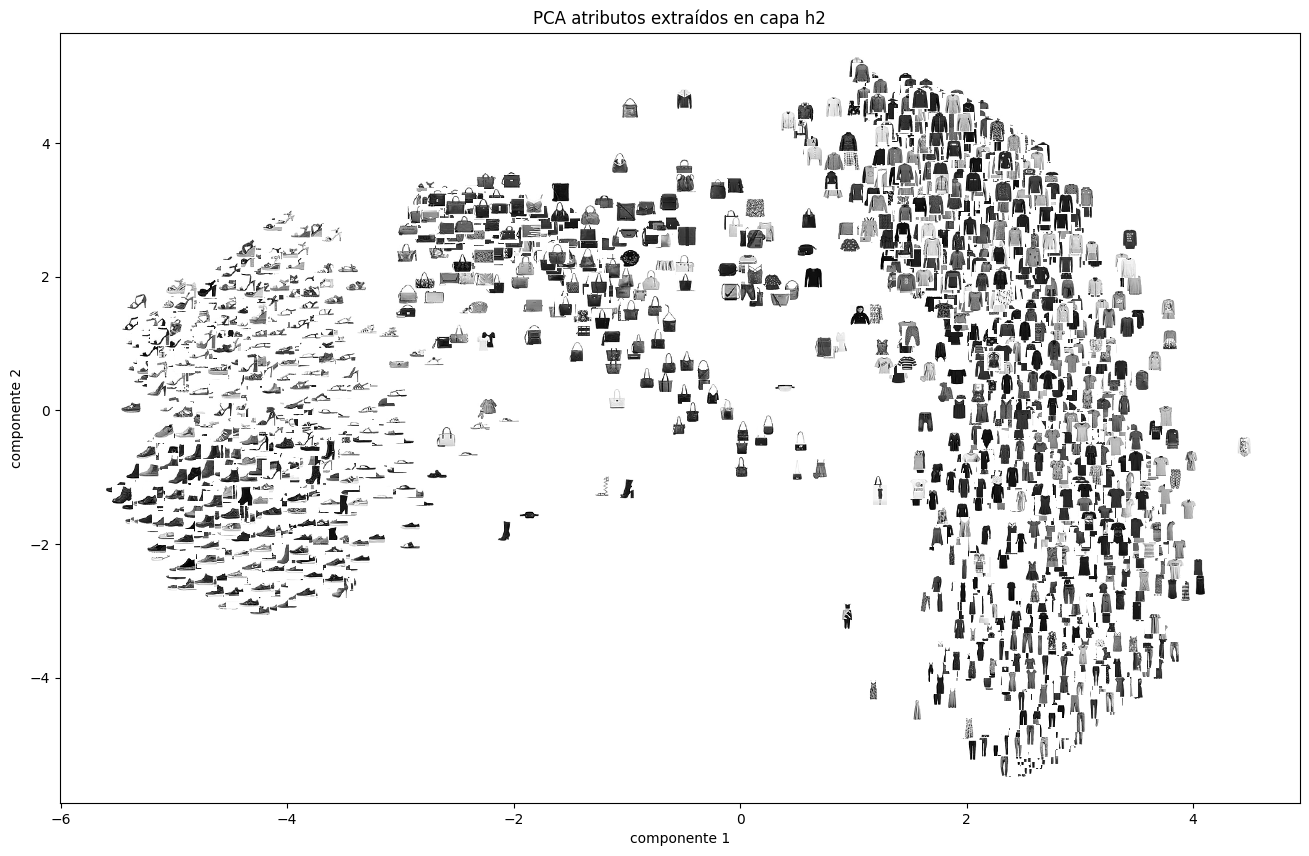

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

In [ ]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


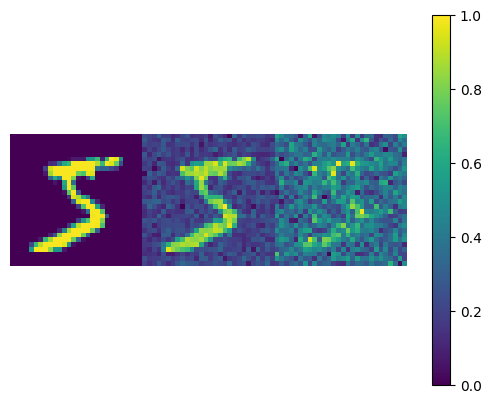

In [ ]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
#veector de salida par o impar
ytrain_B = (y_train % 2)
print(ytrain_B[10:])
print(y_train[10:])

[1 1 1 ... 0 1 0]
[3 5 3 ... 2 1 2]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


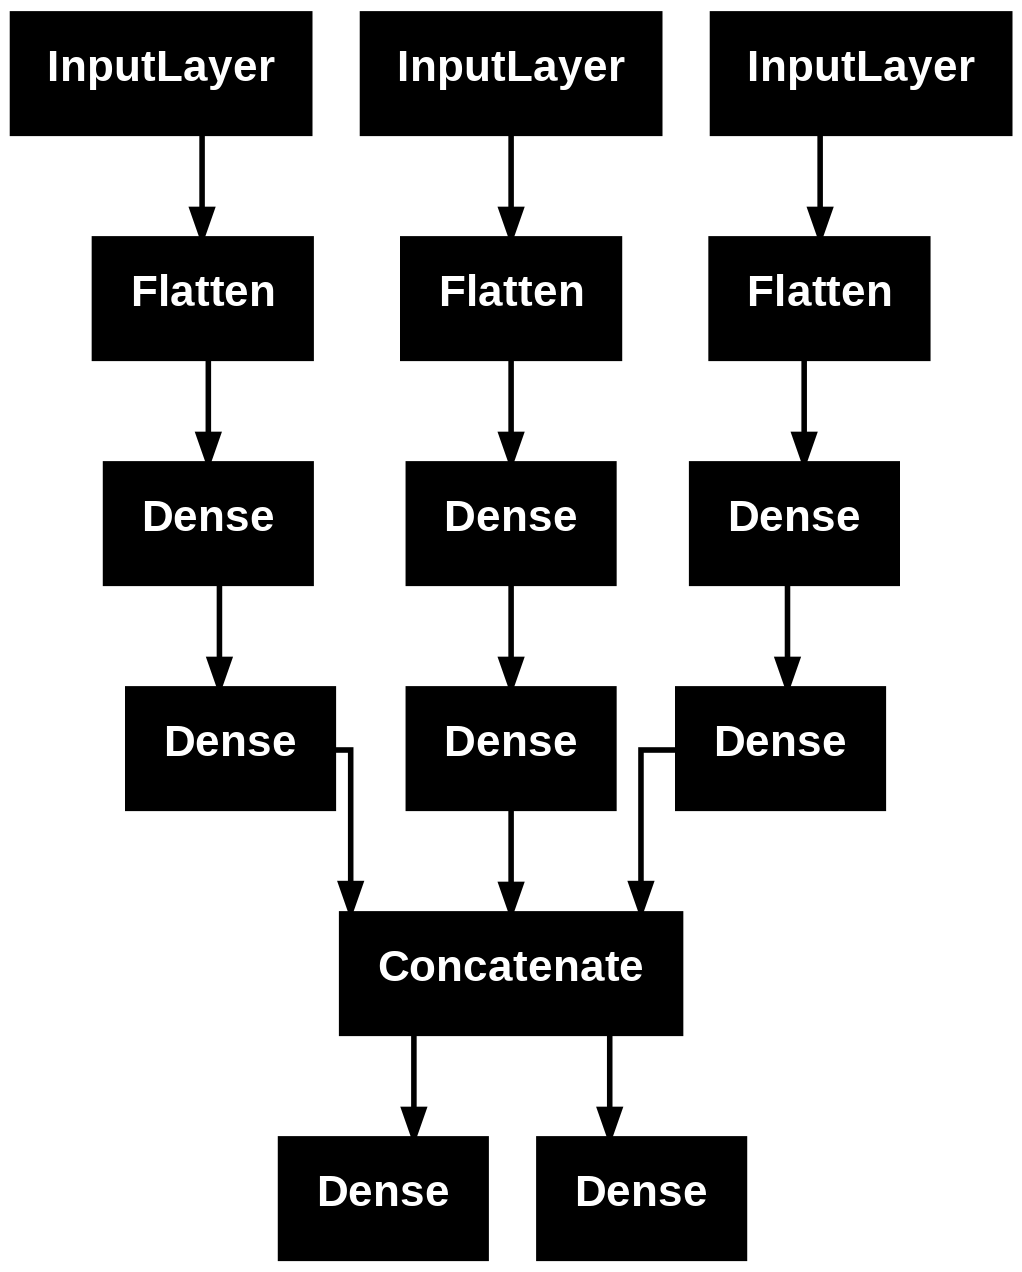

In [ ]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [ ]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

In [7]:
# Parte 1.1: imports y configuración
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("TF:", tf.__version__)


TF: 2.19.0


In [8]:
# Parte 1.2: cargar Fashion-MNIST y particionar (train/valid/test)
(X_full_train, y_full_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalizamos a [0,1]
X_full_train = X_full_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Partición: 55k train, 5k valid (igual que el cuaderno de ayuda)
X_train = X_full_train[:55000]
y_train = y_full_train[:55000].astype('int32')

X_valid = X_full_train[55000:]
y_valid = y_full_train[55000:].astype('int32')

print("Shapes -> train:", X_train.shape, "valid:", X_valid.shape, "test:", X_test.shape)


Shapes -> train: (55000, 28, 28) valid: (5000, 28, 28) test: (10000, 28, 28)


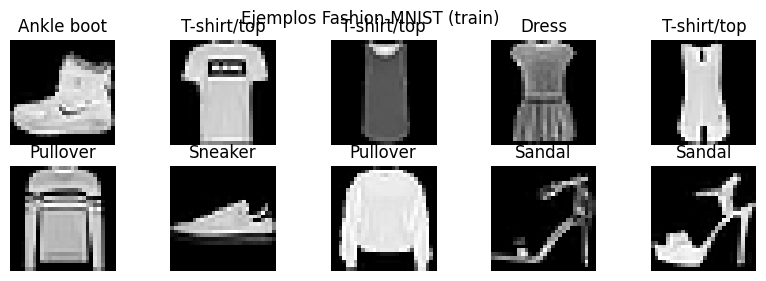

In [9]:
# Parte 1.3: etiquetas de clase (para referencia)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Mostrar algunos ejemplos
plt.figure(figsize=(10,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Ejemplos Fashion-MNIST (train)")
plt.show()


In [10]:
# Parte 1.4: crear etiqueta secundaria "ropa superior vs inferior"
# Definición práctica (puedes ajustarla si quieres otro criterio):
# Consideramos "superior" (1) a: T-shirt/top(0), Pullover(2), Dress(3), Coat(4), Shirt(6)
upper_set = {0, 2, 3, 4, 6}

def make_upper_label(y):
    return np.array([1 if int(v) in upper_set else 0 for v in y], dtype='float32')

y_train_cat  = make_upper_label(y_train)
y_valid_cat  = make_upper_label(y_valid)
y_test_cat   = make_upper_label(y_test)

# Mostrar balance
print("Balance (train) - superiores:", y_train_cat.sum(), " / total:", len(y_train))


Balance (train) - superiores: 27487.0  / total: 55000


In [11]:
# Parte 1.5: pasar a formato (N,H,W,1) y crear las 3 entradas (limpio + ruido var=0.01 + ruido var=0.25)
# Añadimos canal para usar Conv2D luego
X_train = X_train[..., np.newaxis].astype('float32')
X_valid = X_valid[..., np.newaxis].astype('float32')
X_test  = X_test[..., np.newaxis].astype('float32')

print("Shapes con canal:", X_train.shape, X_valid.shape, X_test.shape)

# Función que añade ruido Gaussiano y reescala (manteniendo rango [0,1])
from sklearn.preprocessing import MinMaxScaler

def add_gaussian_noise_and_rescale(X, var, seed=None):
    # X: (N,H,W,1)
    if seed is not None:
        np.random.seed(seed)
    N,H,W,C = X.shape
    noise = np.sqrt(var) * np.random.randn(N,H,W,C).astype('float32')
    Xn = X + noise
    # Reescalado: reproducimos el comportamiento del cuaderno de ayuda
    flat = Xn.reshape(N, -1)
    flat_scaled = MinMaxScaler().fit_transform(flat.T).T
    return flat_scaled.reshape(N,H,W,C)

# Construir listas de inputs (orden: [limpio, ruido_v0.01, ruido_v0.25])
variances = [0.01, 0.25]
inputs_train = [X_train.copy()]
inputs_valid = [X_valid.copy()]
inputs_test  = [X_test.copy()]

for i, v in enumerate(variances):
    inputs_train.append(add_gaussian_noise_and_rescale(X_train, v, seed=SEED+i))
    inputs_valid.append(add_gaussian_noise_and_rescale(X_valid, v, seed=SEED+10+i))
    inputs_test.append(add_gaussian_noise_and_rescale(X_test, v, seed=SEED+20+i))

# Comprobación de shapes
for i, arr in enumerate(inputs_train):
    print(f"inputs_train[{i}] shape = {arr.shape}")


Shapes con canal: (55000, 28, 28, 1) (5000, 28, 28, 1) (10000, 28, 28, 1)
inputs_train[0] shape = (55000, 28, 28, 1)
inputs_train[1] shape = (55000, 28, 28, 1)
inputs_train[2] shape = (55000, 28, 28, 1)


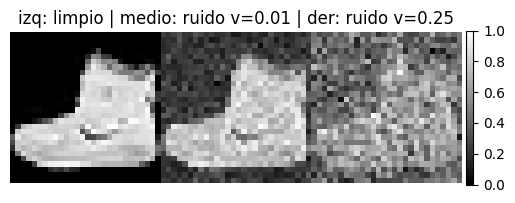

In [12]:
# Parte 1.6: visualizar la primera muestra de las 3 entradas (horizontal)
plt.figure(figsize=(6,2))
sample = np.c_[inputs_train[0][0,:,:,0], inputs_train[1][0,:,:,0], inputs_train[2][0,:,:,0]]
plt.imshow(sample, cmap='gray')
plt.title("izq: limpio | medio: ruido v=0.01 | der: ruido v=0.25")
plt.axis('off')
plt.colorbar(fraction=0.02, pad=0.01)
plt.show()


In [13]:
# Parte 2.1 — limpiar la sesión de Keras
tf.keras.backend.clear_session()

# Para nombrar fácilmente dimensiones
img_h, img_w, ch = X_train.shape[1:]
print(f"Dimensión de entrada: ({img_h}, {img_w}, {ch})")


Dimensión de entrada: (28, 28, 1)


In [14]:
# Parte 2.2 — definición de una función que crea la rama CNN
from tensorflow.keras import layers, Model

def make_cnn_branch(name_prefix=""):
    inp = layers.Input(shape=(img_h, img_w, ch), name=f"input_{name_prefix}")
    x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inp)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu', name=f"features_{name_prefix}")(x)
    return inp, x


In [15]:
# Parte 2.3 — crear las tres ramas CNN
input_1, feat_1 = make_cnn_branch("clean")
input_2, feat_2 = make_cnn_branch("noise001")
input_3, feat_3 = make_cnn_branch("noise025")


In [16]:
# Parte 2.4 — concatenar características y crear salidas
concat = layers.concatenate([feat_1, feat_2, feat_3], name="concat_features")

# Salida 1: tipo de prenda (10 clases)
output_class = layers.Dense(10, activation='softmax', name="output_class")(concat)

# Salida 2: categoría superior/inferior (binaria)
output_upper = layers.Dense(1, activation='sigmoid', name="output_upper")(concat)

# Definir el modelo funcional completo
model_cnn_fun = Model(inputs=[input_1, input_2, input_3],
                      outputs=[output_class, output_upper],
                      name="FashionMNIST_Funcional_CNN")

model_cnn_fun.summary()


Model: "FashionMNIST_Funcional_CNN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_clean         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise001      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noise025      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_clean[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │        320 │ input_noise001[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │        320 │ input_noise025[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 14, 14,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 14, 14,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 7, 7, 64)  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 7, 7, 64)  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 3136)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,265,291 (4.83 MB)

 Trainable params: 1,265,291 (4.83 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Parte 2.5 — compilar el modelo
model_cnn_fun.compile(
    optimizer='adam',
    loss={
        'output_class': 'sparse_categorical_crossentropy',
        'output_upper': 'binary_crossentropy'
    },
    loss_weights={
        'output_class': 1.0,
        'output_upper': 0.5  # puedes ajustar el peso relativo
    },
    metrics={
        'output_class': ['accuracy'],
        'output_upper': ['accuracy']
    }
)


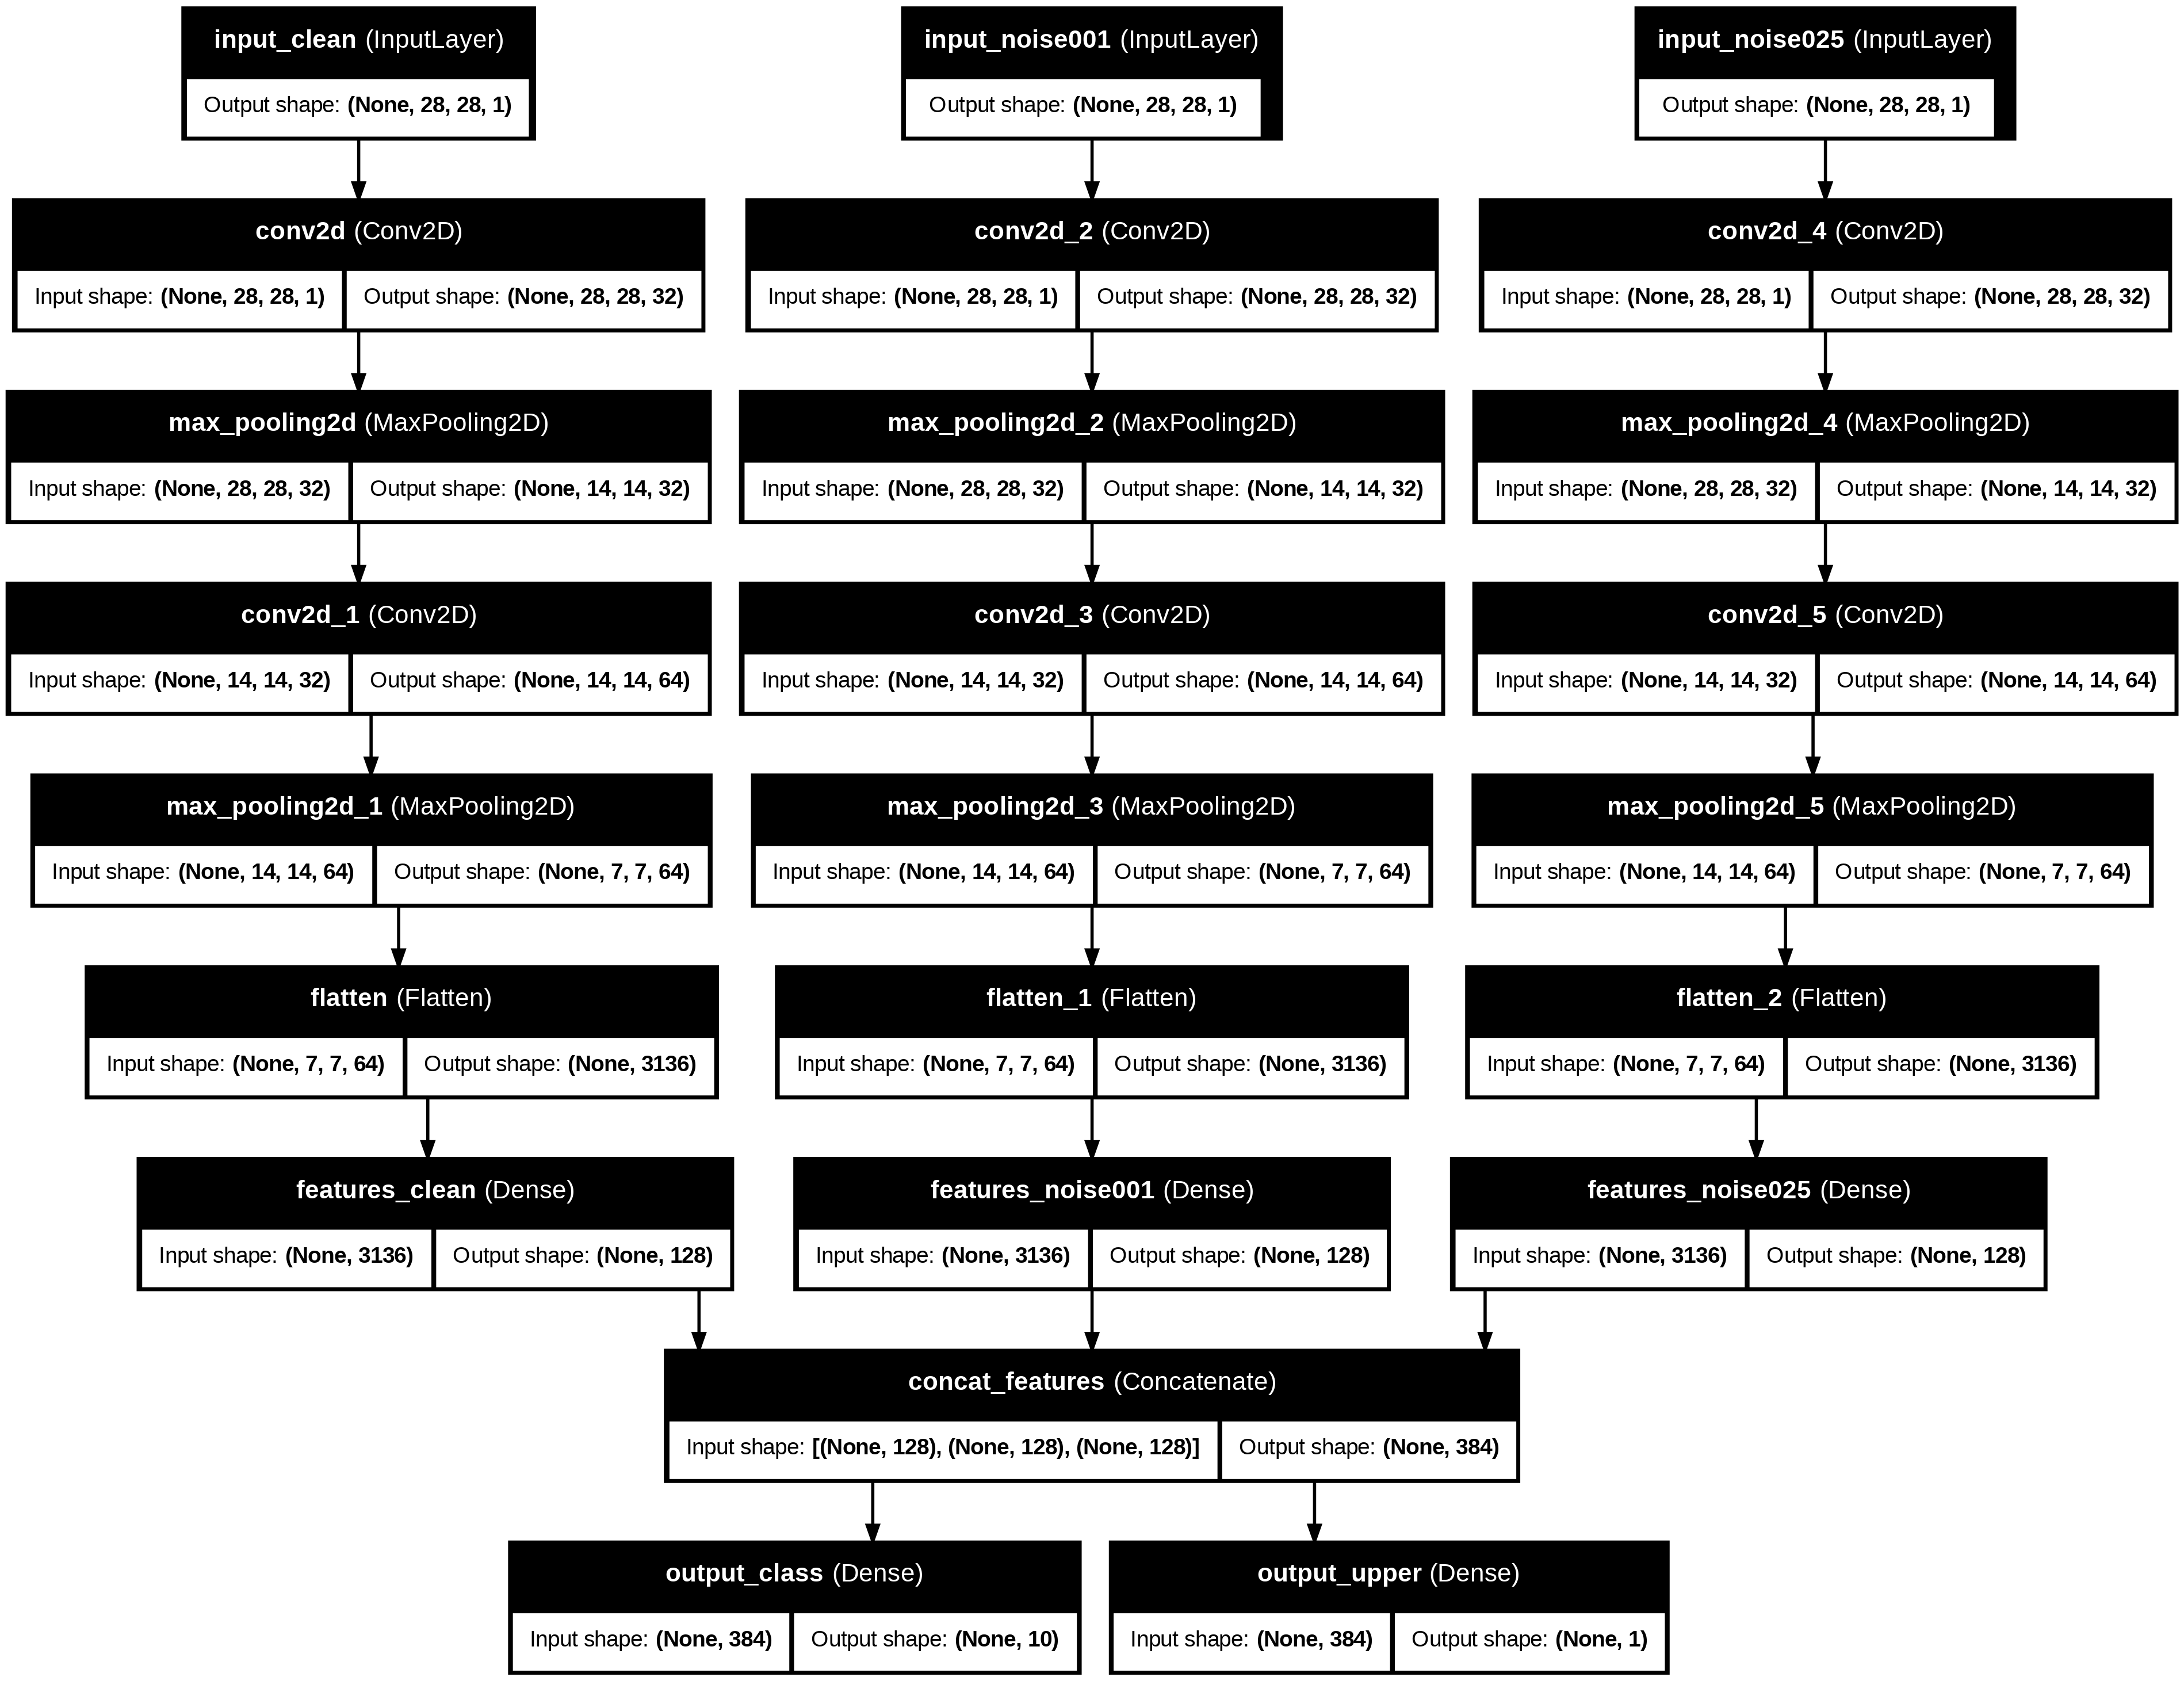

In [18]:
# Parte 2.6 — visualizar arquitectura
from tensorflow.keras.utils import plot_model
plot_model(model_cnn_fun, show_shapes=True, show_layer_names=True, to_file='model_cnn_fun.png')


In [19]:
# Parte 3.1: Entrenamiento del modelo CNN funcional
EPOCHS = 10
BATCH_SIZE = 128

history = model_cnn_fun.fit(
    x=[inputs_train[0], inputs_train[1], inputs_train[2]],
    y={'output_class': y_train, 'output_upper': y_train_cat},
    validation_data=(
        [inputs_valid[0], inputs_valid[1], inputs_valid[2]],
        {'output_class': y_valid, 'output_upper': y_valid_cat}
    ),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 0.8300 - output_class_accuracy: 0.7312 - output_class_loss: 0.7498 - output_upper_accuracy: 0.9355 - output_upper_loss: 0.1604 - val_loss: 0.4126 - val_output_class_accuracy: 0.8534 - val_output_class_loss: 0.3903 - val_output_upper_accuracy: 0.9866 - val_output_upper_loss: 0.0355
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3665 - output_class_accuracy: 0.8760 - output_class_loss: 0.3468 - output_upper_accuracy: 0.9878 - output_upper_loss: 0.0394 - val_loss: 0.3630 - val_output_class_accuracy: 0.8676 - val_output_class_loss: 0.3451 - val_output_upper_accuracy: 0.9914 - val_output_upper_loss: 0.0249
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3001 - output_class_accuracy: 0.8962 - output_class_loss: 0.2861 - output_upper_accuracy: 0.9913 - output_upper_loss: 0.0280 - val_loss: 0.3352 - val_output_class_accuracy: 0.8798 - val_output_class_loss: 0.3187 - val_output_upper_accuracy: 0.9930 - 

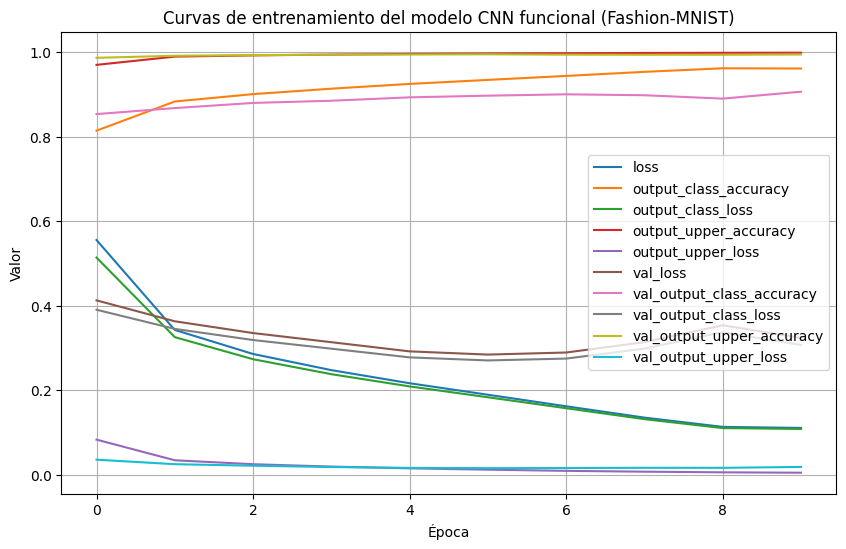

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.title("Curvas de entrenamiento del modelo CNN funcional (Fashion-MNIST)")
plt.xlabel("Época")
plt.ylabel("Valor")
plt.show()


In [21]:
# Parte 3.3: Evaluación en test
results = model_cnn_fun.evaluate(
    [inputs_test[0], inputs_test[1], inputs_test[2]],
    {'output_class': y_test, 'output_upper': y_test_cat}
)
print("\nResultados de evaluación:", dict(zip(model_cnn_fun.metrics_names, results)))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3575 - output_class_accuracy: 0.9038 - output_class_loss: 0.3446 - output_upper_accuracy: 0.9936 - output_upper_loss: 0.0257

Resultados de evaluación: {'loss': 0.3471911549568176, 'compile_metrics': 0.3350098729133606, 'output_class_loss': 0.02515650913119316, 'output_upper_loss': 0.9020000100135803}


In [22]:
# Parte 3.4: Modelo intermedio que entrega las características de la capa de concatenación
intermediate_model = tf.keras.Model(
    inputs=model_cnn_fun.inputs,
    outputs=model_cnn_fun.get_layer('concat_features').output
)

# Extraer características del conjunto de validación
features_valid = intermediate_model.predict(
    [inputs_valid[0], inputs_valid[1], inputs_valid[2]],
    batch_size=256,
    verbose=1
)

print("Shape de las características concatenadas:", features_valid.shape)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Shape de las características concatenadas: (5000, 384)


In [23]:
# Parte 3.5 (opcional): guardar características y etiquetas
import numpy as np

np.savez_compressed("features_valid_fashion_cnn.npz",
                    X=features_valid, y=y_valid, y_upper=y_valid_cat)
print("Características guardadas.")


Características guardadas.


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Parte 4.1: Estandarizar y aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_valid)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Shape del espacio proyectado PCA:", X_pca.shape)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)


Shape del espacio proyectado PCA: (5000, 2)
Varianza explicada por cada componente: [0.1589546  0.12747766]


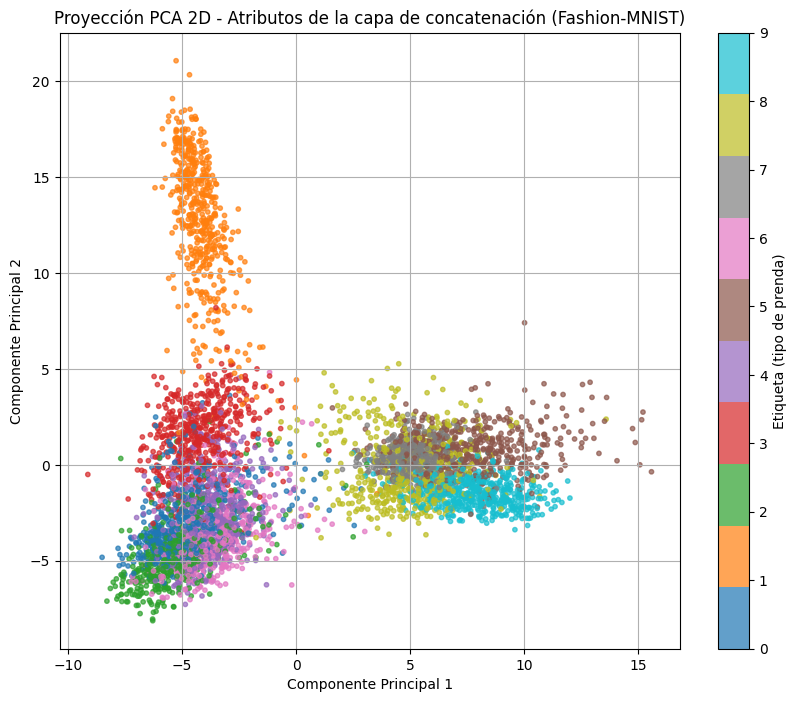

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y_valid, cmap='tab10', alpha=0.7, s=10)
plt.colorbar(scatter, label="Etiqueta (tipo de prenda)")
plt.title("Proyección PCA 2D - Atributos de la capa de concatenación (Fashion-MNIST)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


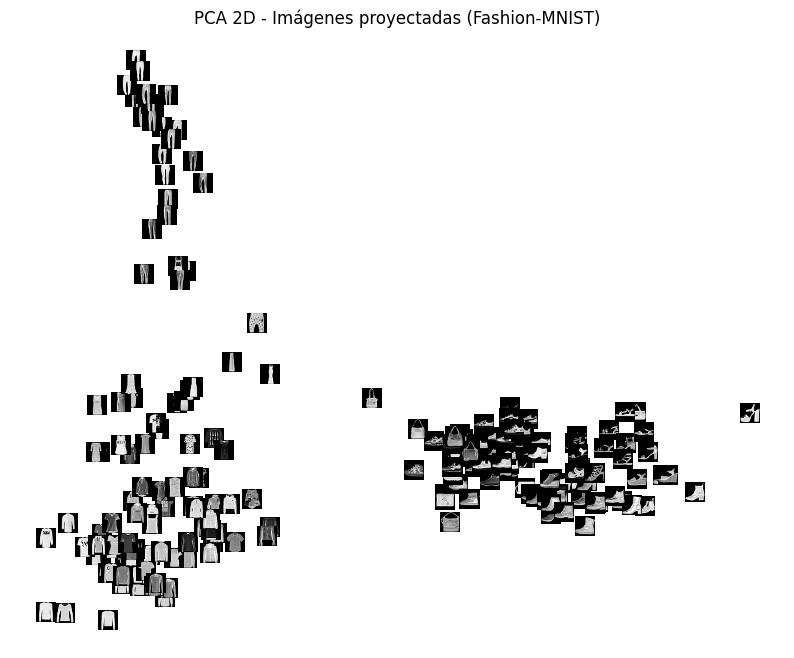

In [26]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def imscatter(x, y, images, ax=None, zoom=0.4):
    if ax is None:
        ax = plt.gca()
    artists = []
    for x0, y0, img in zip(x, y, images):
        im = OffsetImage(img, zoom=zoom, cmap='gray')
        ab = AnnotationBbox(im, (x0, y0), frameon=False)
        artists.append(ax.add_artist(ab))
    return artists

# Seleccionamos un subconjunto de 200 imágenes para no sobrecargar el gráfico
subset = np.random.choice(len(X_pca), 200, replace=False)
plt.figure(figsize=(10,8))
plt.scatter(X_pca[subset,0], X_pca[subset,1], c=y_valid[subset], cmap='tab10', s=20, alpha=0.5)
imscatter(X_pca[subset,0], X_pca[subset,1], inputs_valid[0][subset,:,:,0], zoom=0.5)
plt.title("PCA 2D - Imágenes proyectadas (Fashion-MNIST)")
plt.axis("off")
plt.show()


In [27]:
# Parte 5.2 — Instalación de RAPIDS en Colab (solo ejecutar una vez)
!pip install -q cudf-cu12 cuml-cu12 --extra-index-url=https://pypi.nvidia.com


In [28]:
from cuml.manifold import UMAP
import cupy as cp

# Parte 5.3 — Convertir a GPU array y aplicar UMAP
X_gpu = cp.asarray(features_valid)

umap = UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)
X_umap = umap.fit_transform(X_gpu)

# Convertir a numpy para graficar
X_umap = cp.asnumpy(X_umap)

print("Shape del espacio proyectado UMAP:", X_umap.shape)


[2025-11-10 01:29:37.545] [CUML] [info] build_algo set to brute_force_knn because random_state is given
Shape del espacio proyectado UMAP: (5000, 2)


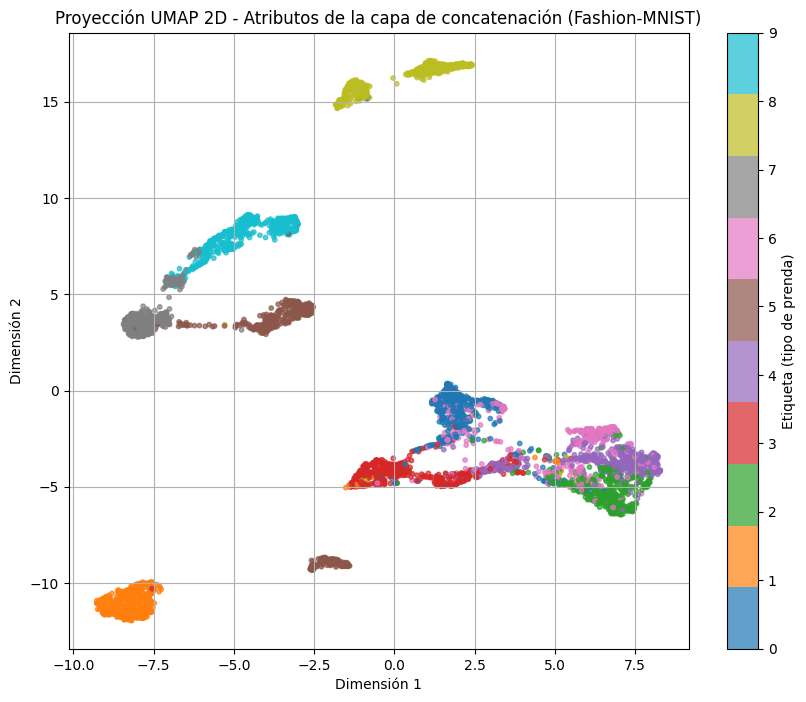

In [29]:
plt.figure(figsize=(10,8))
scatter = plt.scatter(X_umap[:,0], X_umap[:,1], c=y_valid, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label="Etiqueta (tipo de prenda)")
plt.title("Proyección UMAP 2D - Atributos de la capa de concatenación (Fashion-MNIST)")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.show()


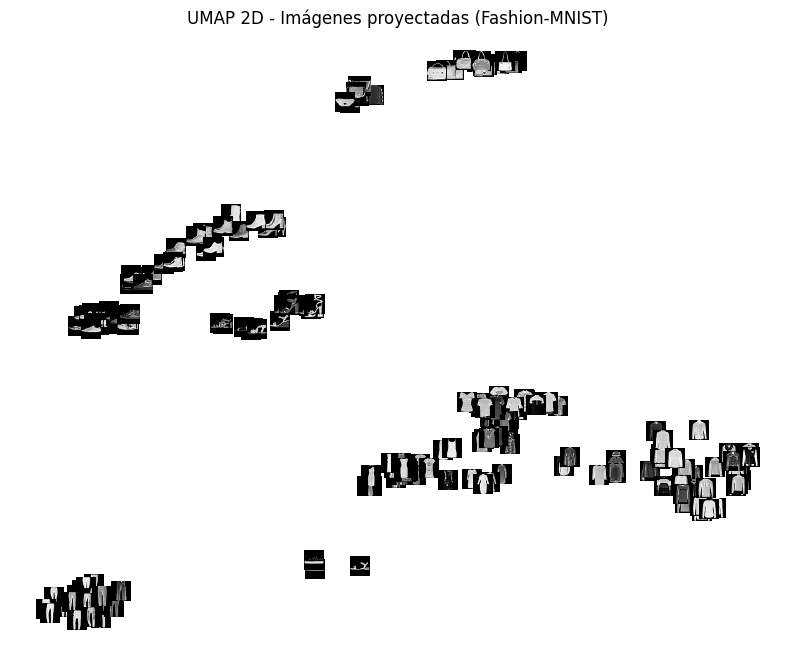

In [30]:
subset = np.random.choice(len(X_umap), 200, replace=False)
plt.figure(figsize=(10,8))
plt.scatter(X_umap[subset,0], X_umap[subset,1], c=y_valid[subset], cmap='tab10', s=20, alpha=0.5)
imscatter(X_umap[subset,0], X_umap[subset,1], inputs_valid[0][subset,:,:,0], zoom=0.5)
plt.title("UMAP 2D - Imágenes proyectadas (Fashion-MNIST)")
plt.axis("off")
plt.show()


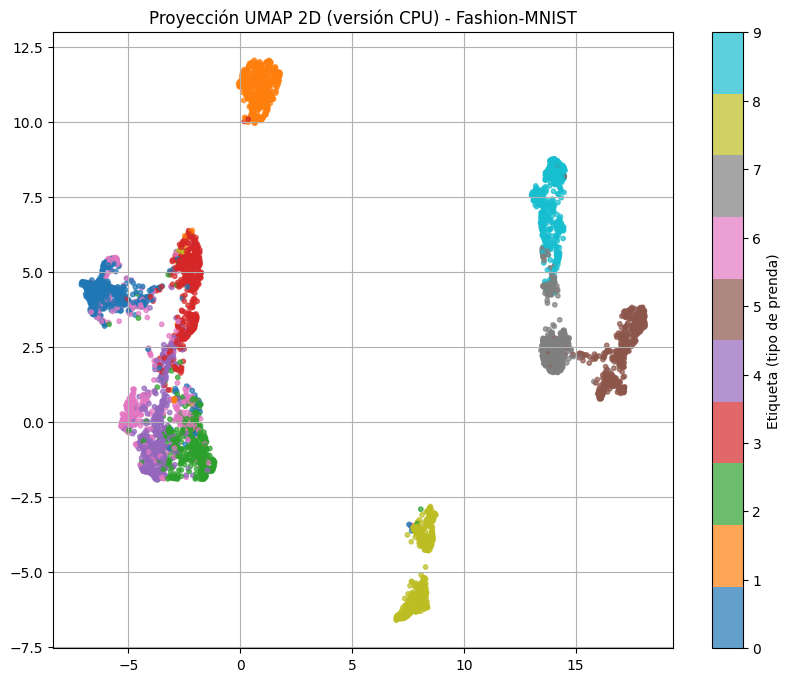

In [31]:
!pip install umap-learn

import umap

umap_cpu = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)
X_umap_cpu = umap_cpu.fit_transform(features_valid)

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_umap_cpu[:,0], X_umap_cpu[:,1], c=y_valid, cmap='tab10', s=10, alpha=0.7)
plt.colorbar(scatter, label="Etiqueta (tipo de prenda)")
plt.title("Proyección UMAP 2D (versión CPU) - Fashion-MNIST")
plt.grid(True)
plt.show()
